DECISSION TREES

Read the housingdata and construct a datafram

In [12]:
import pandas as pd
import numpy as np
credit_df = pd.read_csv('German Credit Data.csv' )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
checkin_acc          1000 non-null object
duration             1000 non-null int64
credit_history       1000 non-null object
amount               1000 non-null int64
savings_acc          1000 non-null object
present_emp_since    1000 non-null object
inst_rate            1000 non-null int64
personal_status      1000 non-null object
residing_since       1000 non-null int64
age                  1000 non-null int64
inst_plans           1000 non-null object
num_credits          1000 non-null int64
job                  1000 non-null object
status               1000 non-null int64
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [13]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [14]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

In [15]:
len(credit_df.columns)

14

In [16]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [17]:
encoded_credit_df = pd.get_dummies(credit_df[X_features],drop_first = True)

In [18]:
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

In [19]:
encoded_credit_df[['checkin_acc_A12','checkin_acc_A13','checkin_acc_A14']].head(5)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [20]:
import statsmodels.api as sm
Y = credit_df.status
X = sm.add_constant(encoded_credit_df)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, Y,test_size = 0.3,random_state = 42 )

In [22]:
#criterion{“gini”, “entropy”}, default=”gini”
#max_depthint, default=None
#min_samples_split :int or float, default=2
#min_samples_leaf: int or float, default=1
#max_features:int, float or {“auto”, “sqrt”, “log2”}, default=None

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
#import pydotplus as pdot.graphviz
from IPython.display import Image

In [25]:
# Export the tree into odt file
export_graphviz( clf_tree_entropy,feature_names = X_train.columns )
out_file = 'chd_tree_entropy.odt'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


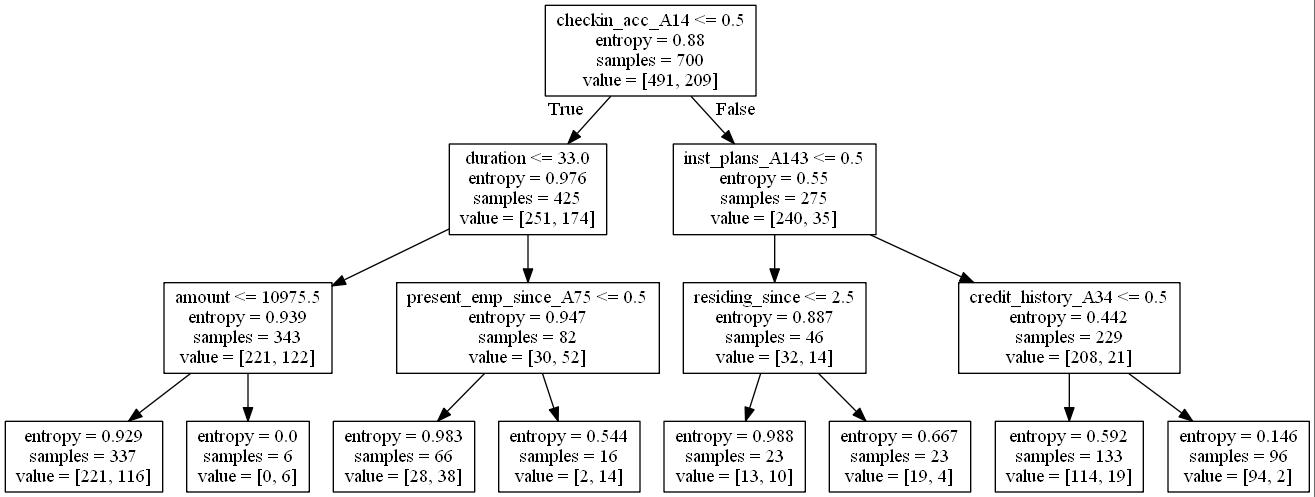

In [26]:
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt')
chd_tree_graph.write_jpg ( 'chd_tree_entropy.png' )
# Render the png file
Image(filename='chd_tree_entropy.png')

In [27]:
import math
entropy_node_1 = - (491/700)*math.log2(491/700) - (209/700)*math.log2(209/700)
print(round( entropy_node_1, 2))

0.88


In [28]:
from sklearn import metrics
tree_predict = clf_tree_entropy.predict( X_test )
metrics.roc_auc_score( y_test, tree_predict )

0.5763972869236027

In [29]:
y_pred_df=pd.DataFrame( {"actual": y_test,"predicted": clf_tree_entropy.predict(X_test)})

In [33]:
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted)
    sn.heatmap(cm, annot=True, fmt='.2f',xticklabels = ['Bad credit', 'Good Credit'],yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

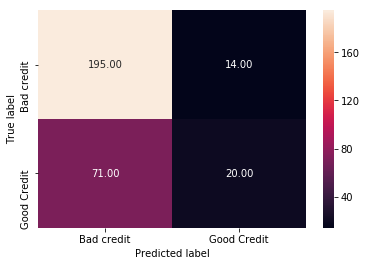

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
draw_cm( y_pred_df.actual,y_pred_df.predicted )

In [32]:
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

             precision    recall  f1-score   support

          0       0.73      0.93      0.82       209
          1       0.59      0.22      0.32        91

avg / total       0.69      0.72      0.67       300

